# 1) 문제 정의
어떤 리스트에서 축소 정복 기법을 이용하여 k번째로 작은 수를 찾아라

# 2) 알고리즘 설명
1. 사용자로부터 리스트를 입력받는다.   
2. 리스트에서 피벗을 결정한다. (보통 리스트의 맨 왼쪽에 해당한다.)   
3. 피벗을 기준으로 왼쪽을 피벗보다 작은 수 오른쪽을 피벗보다 큰 수로 분할한다.
4. 피벗의 인덱스 기준으로 k번째 작은수가 왼쪽인지 오른쪽인지 결정한다.
   (만약 k번째 작은수가 피벗의 인덱스와 같다면 답이 된다.)
5. 방향이 결정되면 다른 방향의 리스트들은 고려하지 않은채 다시 2번부터 반복한다.

# 3) 손으로 푼 예제
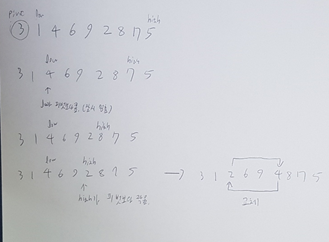

# 4) 코드 설명 (설계)
1. 자료구조 정의   
리스트 a: 
left: 탐색할 리스트의 맨 왼쪽   
right: 탐색할 리스트의 맨 오른쪽    
    
2. 함수 정의   
def partition(A, left, right)   
매개변수: 리스트, 리스트 첫번째 인덱스, 리스트 마지막 인덱스   
함수내용: 피벗을 중심으로 왼쪽은 작은수들 오른쪽은 큰 수로 분할후 피벗의 인덱스를 반환하는 함수      
리턴 값: 분할후 피벗의 인덱스      
   
def quick_select(A, left, right, k)   
매개변수: 리스트, 리스트 첫번째 인덱스, 리스트 마지막 인덱스, k번째로 작은수   
함수내용: 리스트의 left와 right 사이에서 k번째로 작은 수를 찾아 반환하는 함수     
리턴 값: k번째로 작은수    

# 5) 코드

In [1]:
def partition(A, left, right):  # 피벗을 중심으로 리스트를 분할하는 알고리즘
    low = left + 1
    high = right
    pivot = A[left]
    while(low <= high):
         while low <= right and A[low] <= pivot : low += 1
         while high >= left and A[high] > pivot : high -= 1

         if low < high:
             A[low], A[high] = A[high], A[low]

    A[left], A[high] = A[high], A[left]
    return high

def quick_select(A, left, right, k):    # 매개변수:리스트 A, left~right 분할할 범위 ,k번째로 작은수(찾아야되는 데이터)
    pos = partition(A, left, right)     # 피벗의 위치를 반환
    if(pos + 1 == left + k):            # 피벗의 인덱스와 k번째로 작은수가 같을 때
        return A[pos]
    elif(pos + 1 > left + k):
        return quick_select(A, left, pos-1, k)
    else:
        return quick_select(A, pos+1, right, k-(pos+1-left))
    
a = [1, 3, 9, 4, 2]
left = 0
right = len(a) - 1

ans = quick_select(a, left, right, 2)
print(ans)

2



# 6) 수행결과
리스트: 1 3 9 4 2   
2번째로 작은수 출력: 2   
4번째로 작은수 출력: 4


# 7) 복잡도 분석   
최악의 경우 분할할 때마다 부분 리스트의 한쪽은 항목이 없고 다른 한쪽에만 모든 항목이 들어가는 상황이다.   
n에 비례하는 분할이 필요하므로 시간 복잡도가 O(n^2) 이 된다.